# Renewable Energy and Weather conditions

### Objective
To estimate the change in energy consumption in 5 different weather regions. 

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Ignore warnings 
# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_df=pd.read_csv("solar_weather.csv", index_col=False)

#Maintain the original data
data=data_df.copy()
data.sample(10)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
171082,2021-11-26 02:30:00,0,0.0,3.8,1001,92,5.1,0.00,0.0,64,0,0,480,0.00,3,2,11
152646,2021-05-16 01:30:00,0,0.0,8.7,1003,95,2.8,0.32,0.0,54,0,0,960,0.00,5,1,5
122666,2020-07-07 18:30:00,46,12.6,17.0,1015,52,4.3,0.00,0.0,95,1,960,1005,0.96,4,18,7
59863,2018-09-21 13:45:00,697,69.9,28.8,1002,39,8.8,0.00,0.0,74,1,555,735,0.76,3,13,9
188427,2022-06-05 18:45:00,34,4.9,21.0,1016,57,3.3,0.00,0.0,3,1,990,1005,0.99,1,18,6
13173,2017-05-23 05:15:00,509,49.8,9.9,1017,86,1.5,0.00,0.0,100,1,165,975,0.17,4,5,5
71778,2019-01-23 16:30:00,0,0.0,-5.0,1008,79,4.4,0.00,0.0,99,0,0,510,0.00,4,16,1
66677,2018-12-01 13:15:00,22,5.6,-1.0,1015,98,2.7,0.00,0.0,100,1,390,465,0.84,4,13,12
48262,2018-05-23 17:30:00,133,34.0,20.0,1023,48,4.8,0.00,0.0,23,1,900,975,0.92,2,17,5
160402,2021-08-04 20:30:00,0,0.0,16.8,1014,73,3.7,0.00,0.0,7,0,0,930,0.00,1,20,8


#### Understanding the data

In [3]:
data.shape

(196776, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [5]:
data.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [6]:
data.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [7]:
data.duplicated().sum()

0

#### Observations
* There are no missing or duplicated values in the data

In [8]:
data.Time = data.Time.apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    196776 non-null  datetime64[ns]
 1   Energy delta[Wh]        196776 non-null  int64         
 2   GHI                     196776 non-null  float64       
 3   temp                    196776 non-null  float64       
 4   pressure                196776 non-null  int64         
 5   humidity                196776 non-null  int64         
 6   wind_speed              196776 non-null  float64       
 7   rain_1h                 196776 non-null  float64       
 8   snow_1h                 196776 non-null  float64       
 9   clouds_all              196776 non-null  int64         
 10  isSun                   196776 non-null  int64         
 11  sunlightTime            196776 non-null  int64         
 12  dayLength               196776

In [9]:
data['capture_day'] = [d.dayofweek for d in data['Time']]
data['capture_year'] = [d.year for d in data['Time']]
data['Time'] = [d.time() for d in data['Time']]
data["capture_min"]=[d.minute for d in data["Time"]]
data.drop(["Time"], axis=1, inplace=True)
data.sample(10)

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
94183,0,0.0,7.6,1025,88,3.4,0.0,0.0,99,0,0,765,0.00,4,1,9,6,2019,45
15118,2930,162.8,19.1,1008,66,5.8,0.0,0.0,71,1,555,1020,0.54,3,11,6,0,2017,30
122780,0,0.0,11.0,1016,91,2.0,0.0,0.0,96,0,0,1005,0.00,4,23,7,2,2020,0
57774,0,0.0,16.6,1014,95,4.0,0.0,0.0,94,0,0,840,0.00,4,19,8,3,2018,30
33745,171,4.0,7.3,1017,92,9.2,0.0,0.0,100,1,315,450,0.70,4,12,12,5,2017,15
69554,258,31.3,3.8,1029,86,2.0,0.0,0.0,97,1,330,450,0.73,4,12,12,0,2018,30
144704,2364,61.2,3.0,1022,89,4.0,0.0,0.0,2,1,135,630,0.21,1,8,2,0,2021,0
13631,0,0.0,12.7,1022,74,3.2,0.0,0.0,0,0,0,990,0.00,1,23,5,5,2017,45
86410,0,0.2,19.9,1020,89,2.1,0.0,0.0,91,1,15,1020,0.01,4,2,6,2,2019,30
53674,0,0.0,18.2,1013,99,3.8,0.0,0.0,89,0,0,975,0.00,4,2,7,3,2018,30


# Exploratory Data Analysis

### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

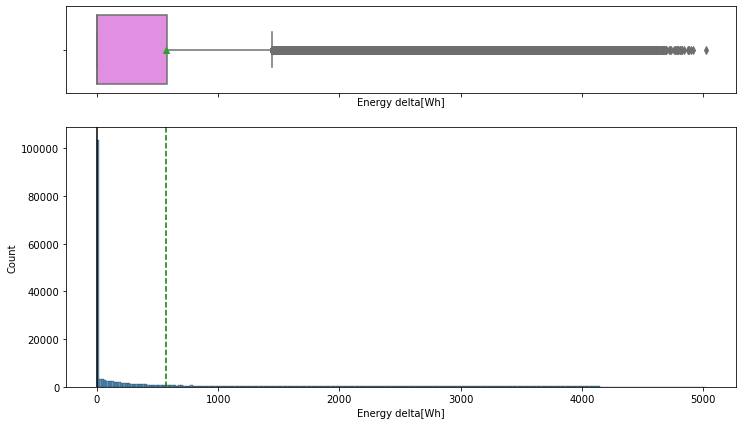

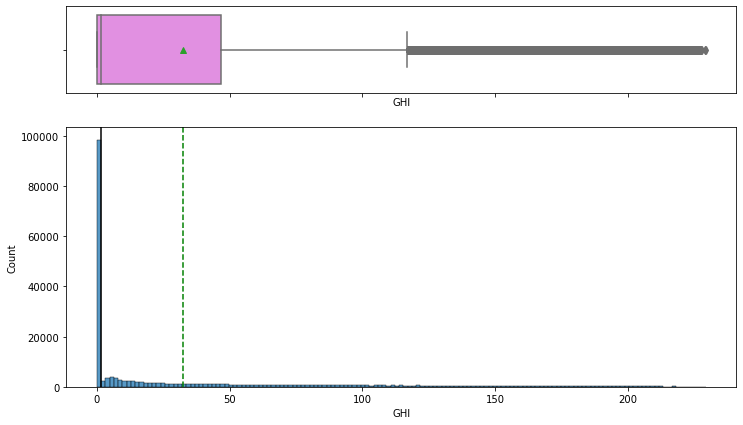

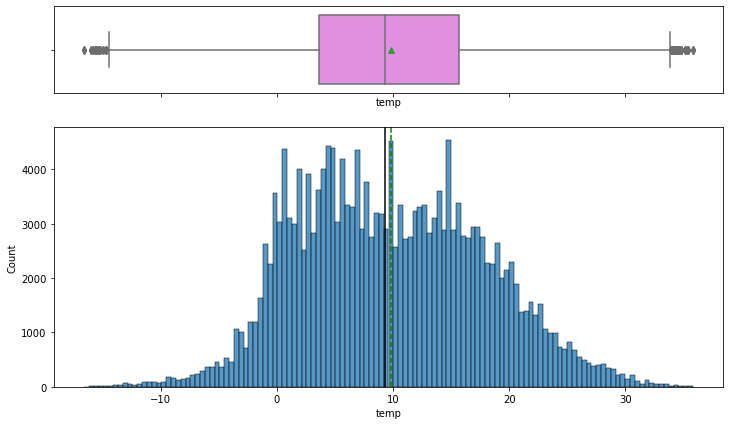

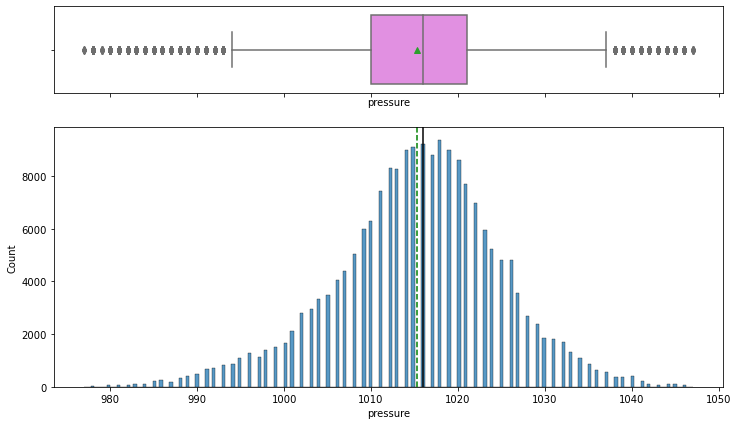

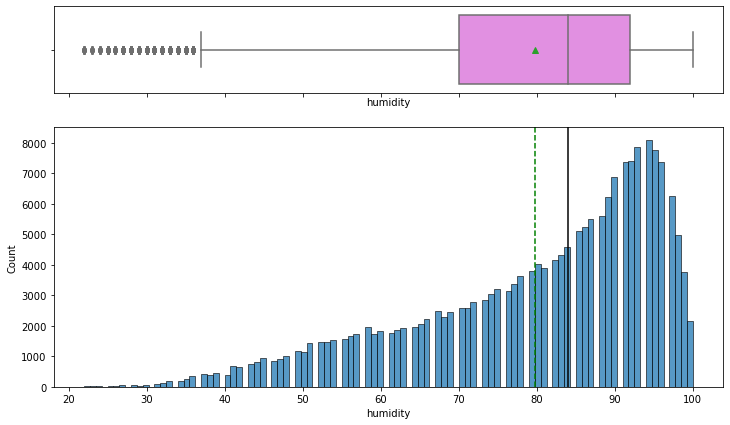

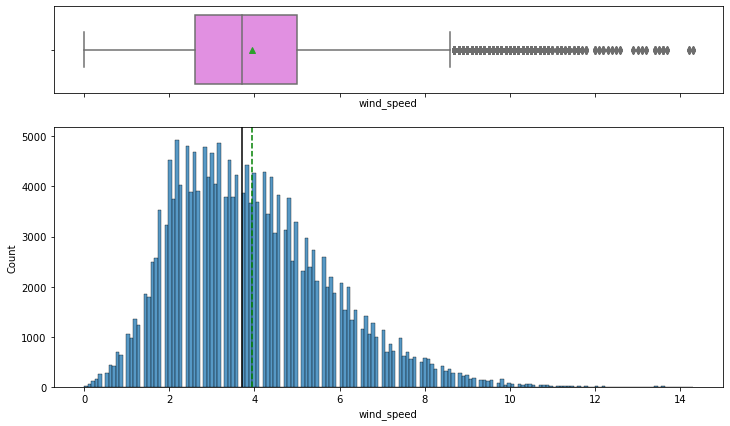

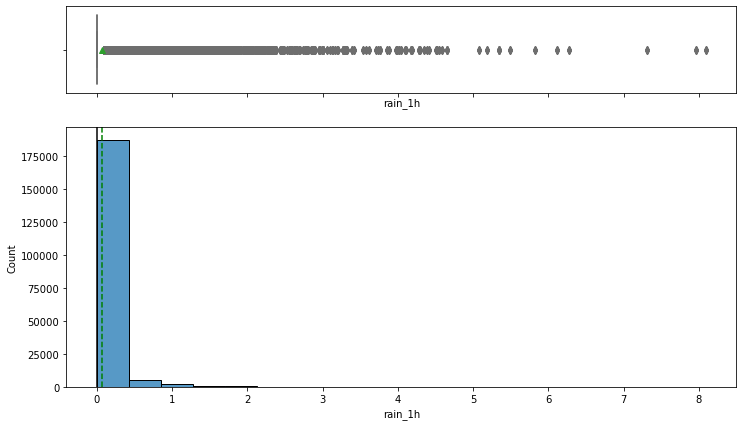

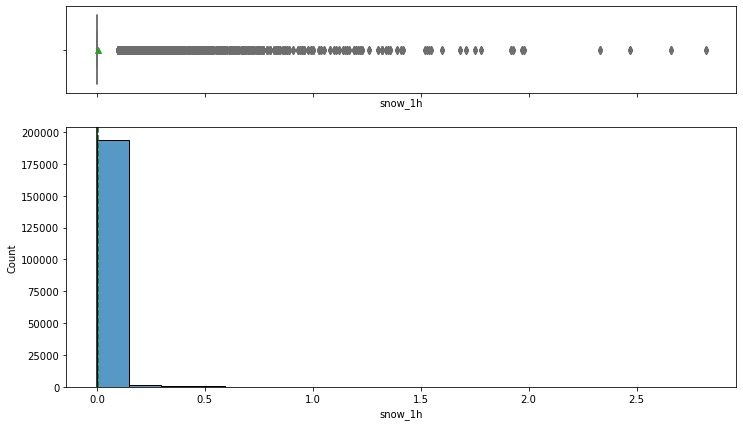

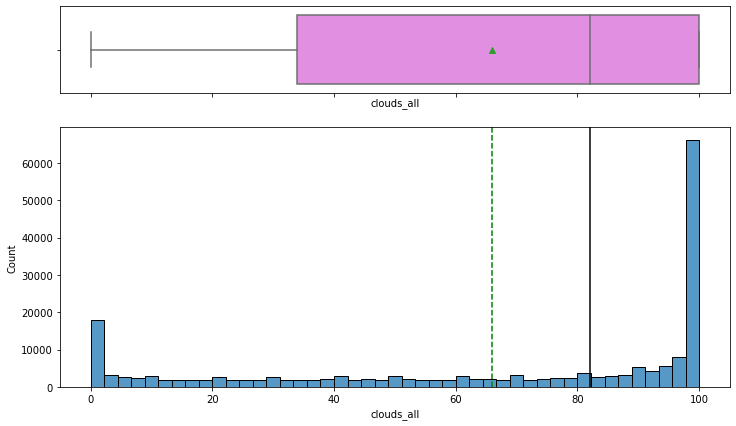

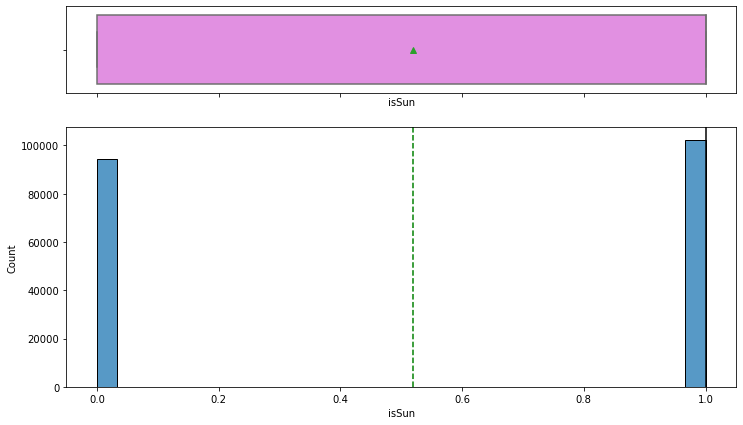

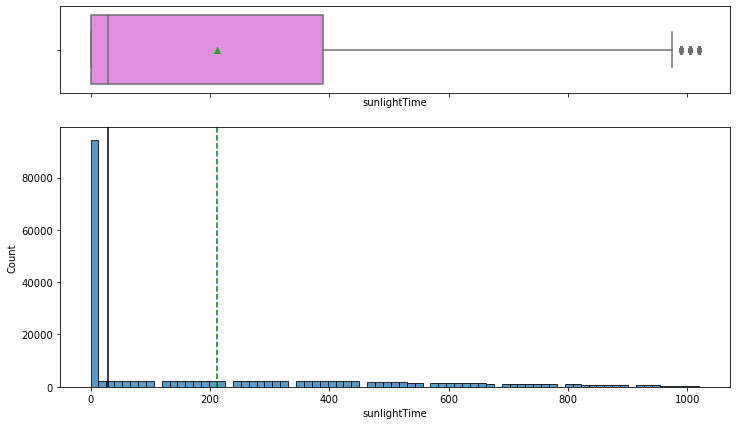

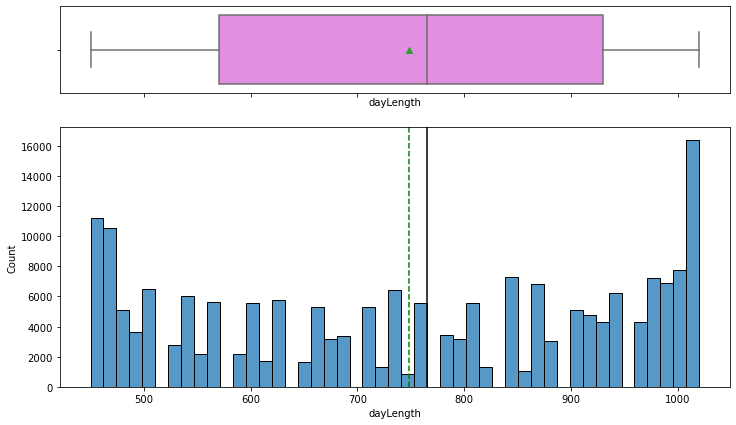

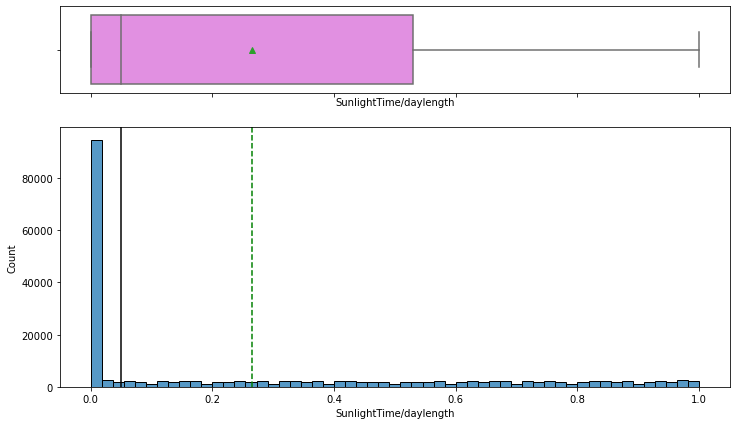

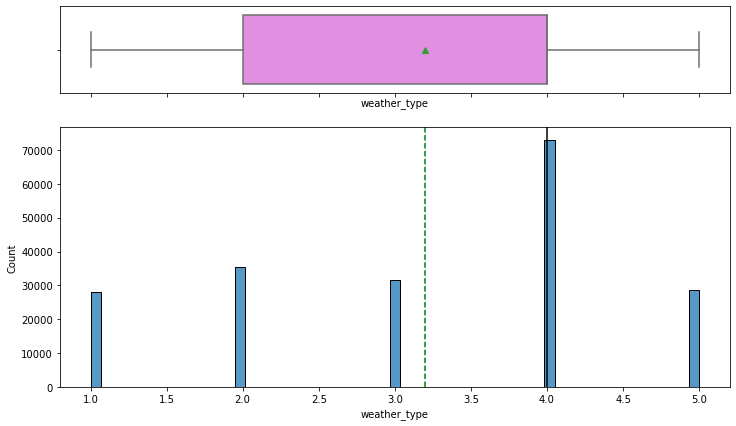

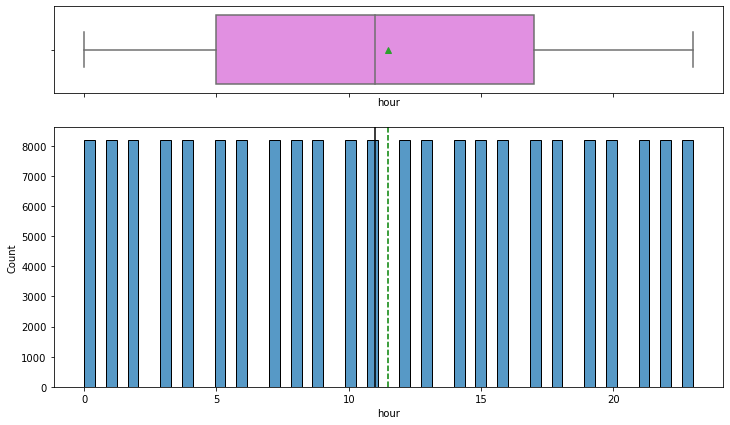

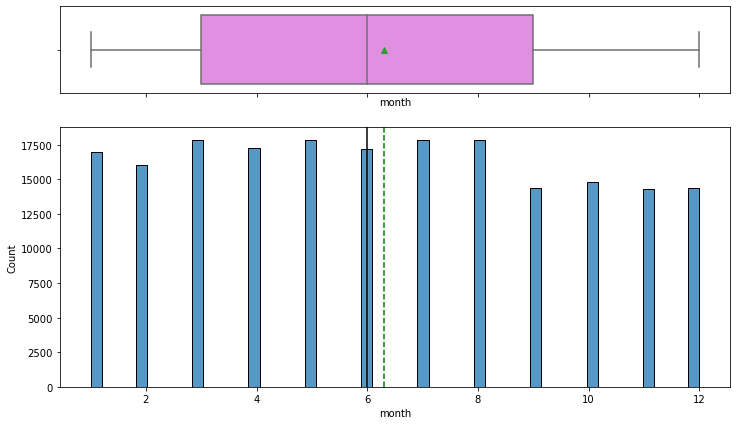

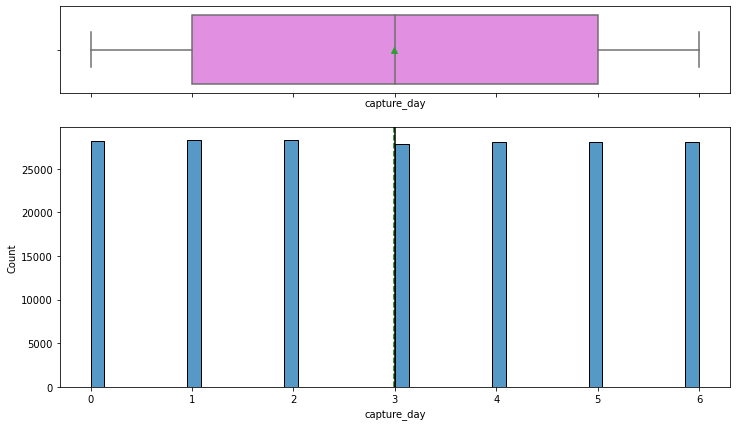

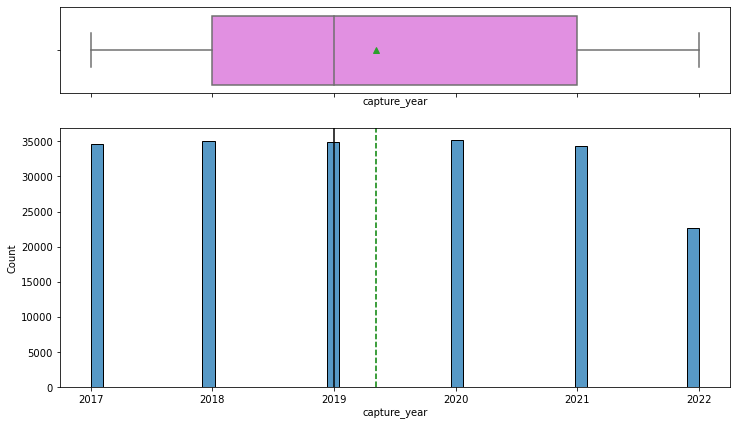

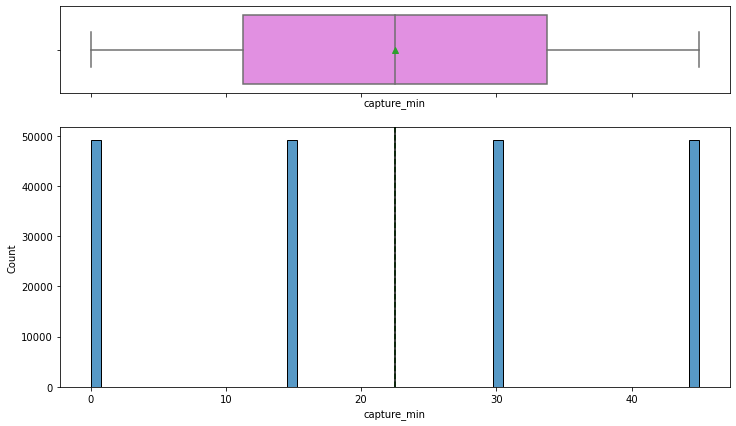

In [11]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item)

In [12]:
data.columns

Index(['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed',
       'rain_1h', 'snow_1h', 'clouds_all', 'isSun', 'sunlightTime',
       'dayLength', 'SunlightTime/daylength', 'weather_type', 'hour', 'month',
       'capture_day', 'capture_year', 'capture_min'],
      dtype='object')

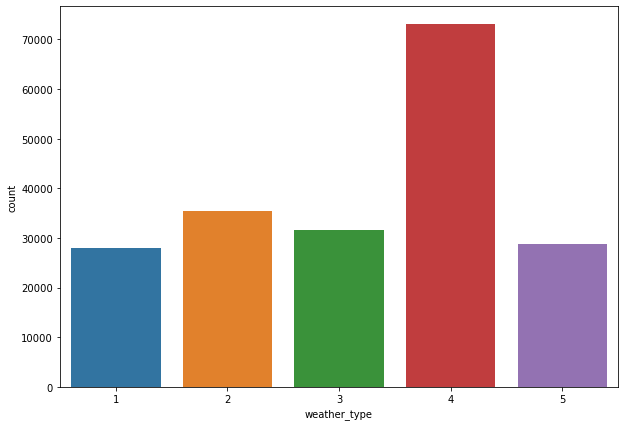

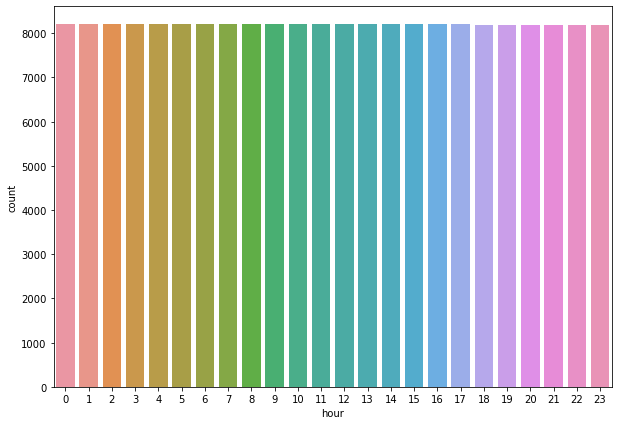

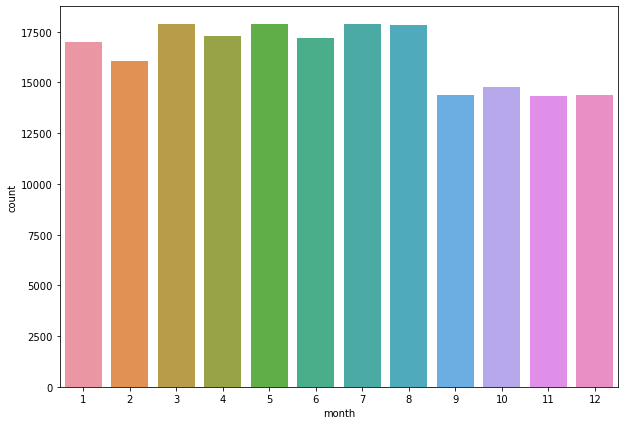

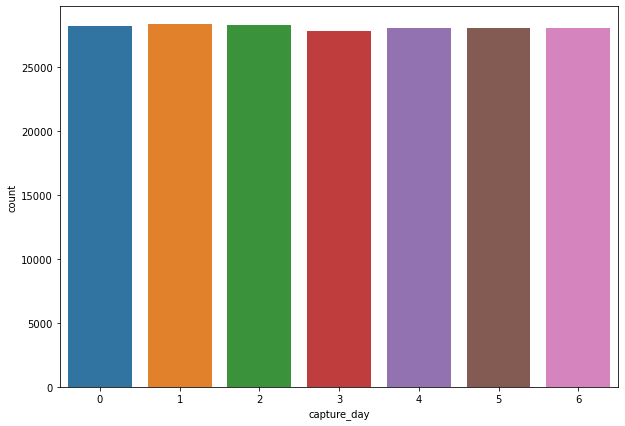

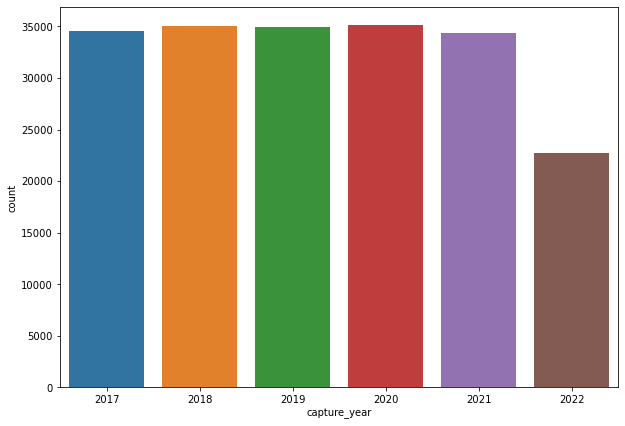

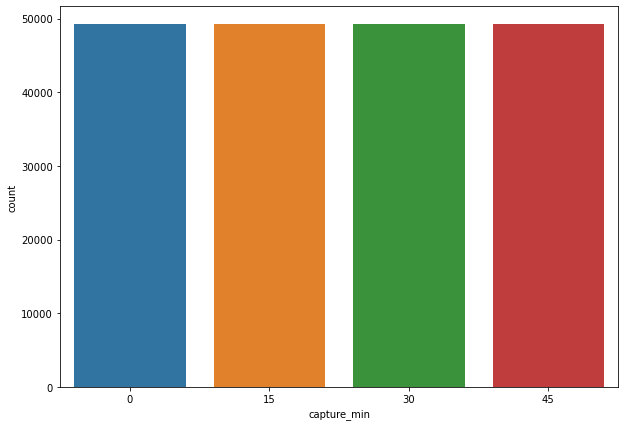

In [13]:
count_col=['weather_type', 'hour', 'month',
       'capture_day', 'capture_year', 'capture_min']
for i in count_col:
    plt.figure(figsize=(10,7));
    sns.countplot(data=data, x=i)
    plt.show()

#### Bivariate Analysis


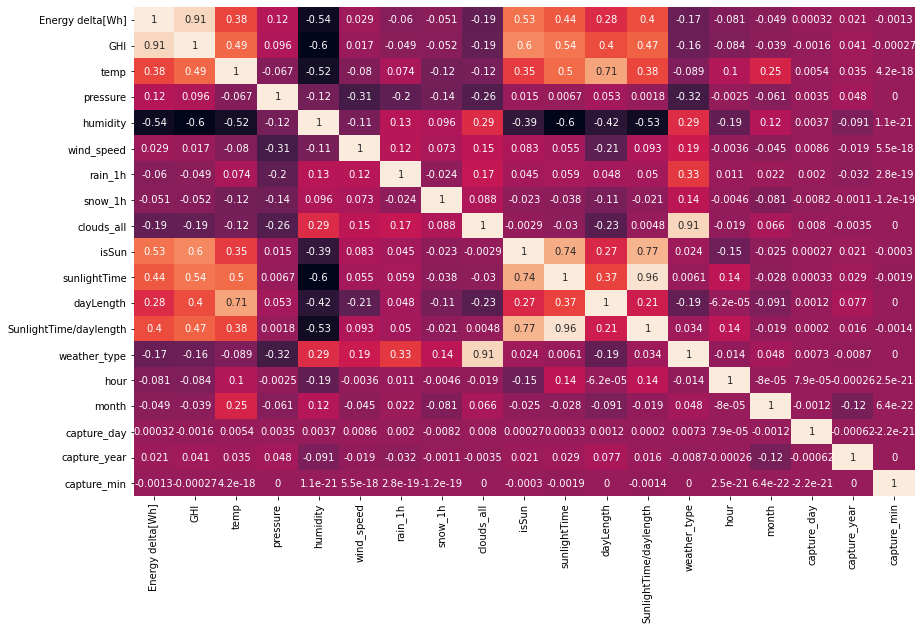

In [14]:
plt.figure(figsize=(14,9));
sns.heatmap(data=data.corr(), annot=True, cbar=False);

#### Observations
* Variables with a correlaion larger than 0.68 (positive or negative) are:
    1. SunlightTime/daylength and isSun
    2. SunlightTime/daylength and SunlightTime
    3. clouds_all and weather_type
    4. temp and dayLength
    5. Energy Delta and GHI


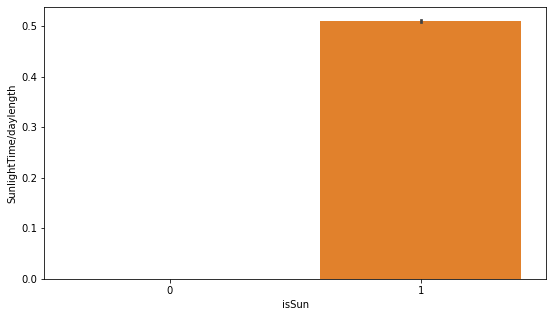

In [15]:
plt.figure(figsize=(9,5));
sns.barplot(data=data, y="SunlightTime/daylength", x="isSun");

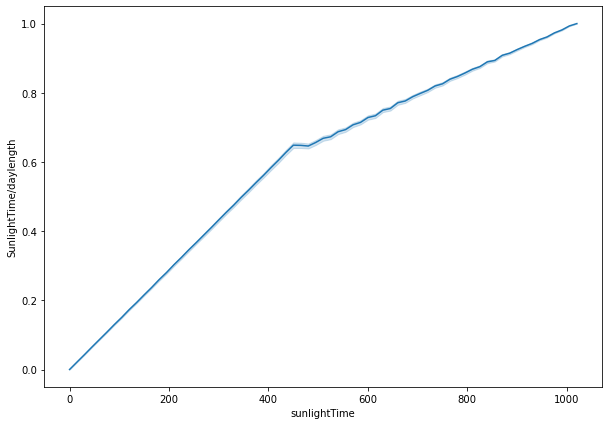

In [16]:
plt.figure(figsize=(10,7));
sns.lineplot(data=data, y="SunlightTime/daylength", x="sunlightTime");

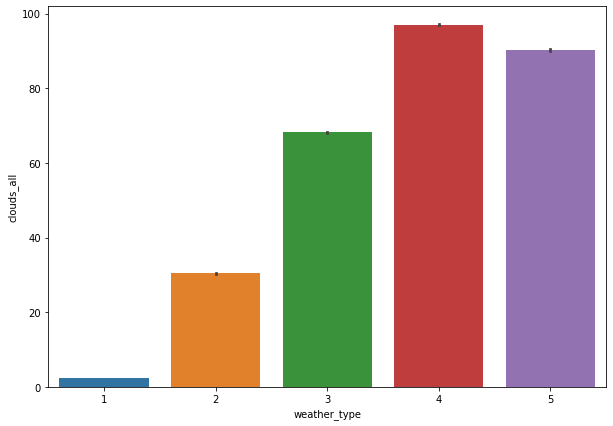

In [17]:
plt.figure(figsize=(10,7));
sns.barplot(data=data, y="clouds_all", x="weather_type");

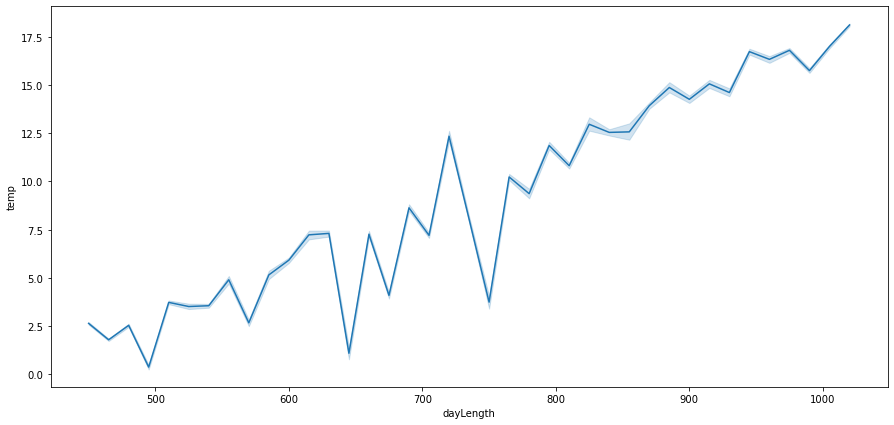

In [18]:
plt.figure(figsize=(15,7));
sns.lineplot(data=data, y="temp", x="dayLength");

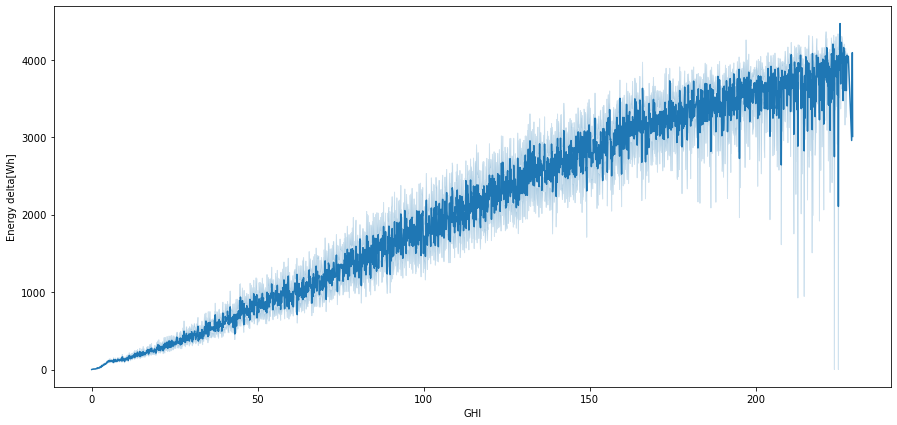

In [19]:
plt.figure(figsize=(15,7));
sns.lineplot(data=data, y="Energy delta[Wh]", x="GHI");

### Data Processing

#### Split the data

In [20]:
# independent variables
X = data.drop(["Energy delta[Wh]"], axis=1)
# dependent variable
y = data[["Energy delta[Wh]"]]

### Linear model for:

#### 1. Weather type 1

In [21]:
#Grouping all the data for weather type 1
w1_x=X.loc[data["weather_type"]==1]
w1_y=y.loc[data["weather_type"]==1]

In [22]:
# Building the linear model 
w1_x=sm.add_constant(w1_x)

#Splitting the data into training and testing by the ratio 7:3
w1_x_train, w1_x_test, w1_y_train, w1_y_test = train_test_split(
    w1_x, w1_y, test_size=0.30, random_state=1
)


In [23]:
#Fitting the model
w1_olsmodel=sm.OLS(w1_y_train, w1_x_train).fit()
print(w1_olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:       Energy delta[Wh]   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:26:18   Log-Likelihood:            -1.4580e+05
No. Observations:               19583   AIC:                         2.916e+05
Df Residuals:                   19567   BIC:                         2.918e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
GHI                       21

### Multicolinearity

In [24]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


In [25]:
#Calculating the VIF of each column
checking_vif(w1_x_train)

,feature,VIF
0,GHI,2.824437e+00
1,temp,4.331760e+00
2,pressure,1.356921e+00
3,humidity,3.319761e+00
4,wind_speed,1.341271e+00
5,rain_1h,NaN
6,snow_1h,NaN
7,clouds_all,1.082874e+00
8,isSun,4.183052e+00
9,sunlightTime,2.922950e+01


In [26]:
#Analysis of rain1h and snow1h
print(w1_x_train.rain_1h.value_counts(normalize=True))
print(w1_x_train.snow_1h.value_counts(normalize=True))


0.0    1.0
Name: rain_1h, dtype: float64
0.0    1.0
Name: snow_1h, dtype: float64


In [27]:
#Dropping rain and snow columns as they only have 0 values for this subset
w1_x_train.drop(["rain_1h", "snow_1h"], axis=1, inplace=True)
w1_x_train

,GHI,temp,pressure,humidity,wind_speed,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
2172,5.7,-0.5,1021,74,3.2,4,1,510,525,0.97,1,15,1,5,2017,0
69511,0.0,2.7,1027,97,3.1,8,0,0,450,0.00,1,1,12,0,2018,45
61812,0.0,16.3,1021,72,5.6,0,0,0,660,0.00,1,21,10,3,2018,0
19683,0.0,14.1,1013,98,0.5,3,0,0,945,0.00,1,0,7,6,2017,45
86679,0.0,12.4,1023,92,2.0,0,0,0,1020,0.00,1,21,6,4,2019,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74287,0.0,4.3,1017,84,2.6,0,0,0,600,0.00,1,19,2,0,2019,45
114169,73.9,3.0,1027,86,2.3,0,1,135,810,0.17,1,6,4,4,2020,15
45196,0.0,10.4,1020,70,2.3,0,0,0,870,0.00,1,19,4,5,2018,0
79848,0.0,12.6,1029,52,3.4,0,0,0,840,0.00,1,18,4,2,2019,0


In [28]:
#Checking the new VIF after dropping the columns
checking_vif(w1_x_train)

,feature,VIF
0,GHI,2.824437e+00
1,temp,4.331760e+00
2,pressure,1.356921e+00
3,humidity,3.319761e+00
4,wind_speed,1.341271e+00
5,clouds_all,1.082874e+00
6,isSun,4.183052e+00
7,sunlightTime,2.922950e+01
8,dayLength,2.626387e+00
9,SunlightTime/daylength,3.167072e+01


In [29]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [30]:
#Original Model asjusted R value 0.842
col_list=["weather_type","SunlightTime/daylength","sunlightTime"]
res = treating_multicollinearity(w1_x_train, w1_y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weather_type,0.930180,414.465740
1,SunlightTime/daylength,0.889645,444.685083
2,sunlightTime,0.886981,450.019563


In [31]:
col_to_drop = "sunlightTime"
w1_x_train2 = w1_x_train.loc[:, ~w1_x_train.columns.str.startswith(col_to_drop)]
w1_x_test2 = w1_x_test.loc[:, ~w1_x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w1_x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  sunlightTime


,feature,VIF
0,GHI,2.767105e+00
1,temp,4.327978e+00
2,pressure,1.356490e+00
3,humidity,3.318358e+00
4,wind_speed,1.340053e+00
5,clouds_all,1.082679e+00
6,isSun,4.094321e+00
7,dayLength,2.198866e+00
8,SunlightTime/daylength,4.056070e+00
9,weather_type,1.704300e+06


In [32]:
col_to_drop = "weather_type"
w1_x_train3 = w1_x_train2.loc[:, ~w1_x_train2.columns.str.startswith(col_to_drop)]
w1_x_test3 = w1_x_test2.loc[:, ~w1_x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w1_x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weather_type


,feature,VIF
0,GHI,4.046593
1,temp,9.908076
2,pressure,20325.564825
3,humidity,54.412911
4,wind_speed,9.212725
5,clouds_all,1.733272
6,isSun,7.966441
7,dayLength,53.884515
8,SunlightTime/daylength,6.192772
9,hour,4.824414


In [33]:
col_to_drop = "pressure"
w1_x_train4 = w1_x_train3.loc[:, ~w1_x_train3.columns.str.startswith(col_to_drop)]
w1_x_test4 = w1_x_test3.loc[:, ~w1_x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w1_x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  pressure


,feature,VIF
0,GHI,4.034800
1,temp,9.368769
2,humidity,53.062123
3,wind_speed,8.551137
4,clouds_all,1.705297
5,isSun,7.965252
6,dayLength,53.791532
7,SunlightTime/daylength,6.192261
8,hour,4.817843
9,month,8.461388


In [34]:
col_to_drop = "capture_year"
w1_x_train5 = w1_x_train4.loc[:, ~w1_x_train4.columns.str.startswith(col_to_drop)]
w1_x_test5 = w1_x_test4.loc[:, ~w1_x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w1_x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  capture_year


,feature,VIF
0,GHI,3.568708
1,temp,8.764006
2,humidity,26.586704
3,wind_speed,5.901301
4,clouds_all,1.678463
5,isSun,7.786087
6,dayLength,32.838772
7,SunlightTime/daylength,5.181837
8,hour,4.169868
9,month,8.262512


In [35]:
col_to_drop = "humidity"
w1_x_train6 = w1_x_train5.loc[:, ~w1_x_train5.columns.str.startswith(col_to_drop)]
w1_x_test6 = w1_x_test5.loc[:, ~w1_x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w1_x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  humidity


,feature,VIF
0,GHI,3.418600
1,temp,5.464990
2,wind_speed,5.829997
3,clouds_all,1.633680
4,isSun,7.539794
5,dayLength,13.669835
6,SunlightTime/daylength,4.877015
7,hour,4.145389
8,month,5.738258
9,capture_day,3.076615


In [36]:
col_to_drop = "dayLength"
w1_x_train7 = w1_x_train6.loc[:, ~w1_x_train6.columns.str.startswith(col_to_drop)]
w1_x_test7 = w1_x_test6.loc[:, ~w1_x_test6.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w1_x_train7)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  dayLength


,feature,VIF
0,GHI,3.411620
1,temp,4.606136
2,wind_speed,5.167501
3,clouds_all,1.608043
4,isSun,6.813214
5,SunlightTime/daylength,4.423742
6,hour,3.658416
7,month,5.566191
8,capture_day,2.821845
9,capture_min,2.552071


In [37]:
col_to_drop = "isSun"
w1_x_train8 = w1_x_train7.loc[:, ~w1_x_train7.columns.str.startswith(col_to_drop)]
w1_x_test8 = w1_x_test7.loc[:, ~w1_x_test7.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w1_x_train8)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  isSun


,feature,VIF
0,GHI,2.495252
1,temp,4.540626
2,wind_speed,5.064121
3,clouds_all,1.603695
4,SunlightTime/daylength,2.470743
5,hour,3.378905
6,month,5.336118
7,capture_day,2.797302
8,capture_min,2.523124


In [38]:
w1_olsmodel2 = sm.OLS(w1_y_train, w1_x_train8).fit()
print(w1_olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                          2.156e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:21   Log-Likelihood:                     -1.4847e+05
No. Observations:               19583   AIC:                                  2.970e+05
Df Residuals:                   19574   BIC:                                  2.970e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Dropping high P values
#### Dropping the columns whose p-value is >0.05(5%)

In [39]:
# initial list of columns
cols = w1_x_train8.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = w1_x_train8[cols]

    # fitting the model
    model = sm.OLS(w1_y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['GHI', 'temp', 'wind_speed', 'clouds_all', 'SunlightTime/daylength', 'hour', 'month', 'capture_day', 'capture_min']


In [40]:
w1_x_train9= w1_x_train8[selected_features]
w1_x_test9= w1_x_test8[selected_features]
w1_olsmodel3 = sm.OLS(w1_y_train, w1_x_train9).fit()
print(w1_olsmodel3.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                          2.156e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:22   Log-Likelihood:                     -1.4847e+05
No. Observations:               19583   AIC:                                  2.970e+05
Df Residuals:                   19574   BIC:                                  2.970e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [41]:
#Final equation
Equation = "Energy Delt(Wh) ="
print(Equation, end=" ")
for i in range(len(w1_x_train9.columns)):
    if i == 0:
        print(w1_olsmodel3.params[i], "+", end=" ")
    elif i != len(w1_x_train9.columns) - 1:
        print(
            "(",
            w1_olsmodel3.params[i],
            ")*(",
            w1_x_train9.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", w1_olsmodel3.params[i], ")*(", w1_x_train9.columns[i], ")")

Energy Delt(Wh) = 20.658730134222044 + ( -23.17920344186072 )*( temp ) + ( 20.382494762087585 )*( wind_speed ) + ( -7.478894879199357 )*( clouds_all ) + ( 80.35129676703073 )*( SunlightTime/daylength ) + ( 5.7038287297624235 )*( hour ) + ( 8.589130127256379 )*( month ) + ( -4.8997061156686685 )*( capture_day ) + ( -0.5963918289935076 )*( capture_min )


#### 2. Weather type 2


In [42]:
#Grouping all the data for weather type 2
w2_x=X.loc[data["weather_type"]==2]
w2_y=y.loc[data["weather_type"]==2]

In [43]:
#Exploring the data
w2_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35428 entries, 144 to 196767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GHI                     35428 non-null  float64
 1   temp                    35428 non-null  float64
 2   pressure                35428 non-null  int64  
 3   humidity                35428 non-null  int64  
 4   wind_speed              35428 non-null  float64
 5   rain_1h                 35428 non-null  float64
 6   snow_1h                 35428 non-null  float64
 7   clouds_all              35428 non-null  int64  
 8   isSun                   35428 non-null  int64  
 9   sunlightTime            35428 non-null  int64  
 10  dayLength               35428 non-null  int64  
 11  SunlightTime/daylength  35428 non-null  float64
 12  weather_type            35428 non-null  int64  
 13  hour                    35428 non-null  int64  
 14  month                   35428 non-n

In [44]:
w2_x.describe()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
count,35428.000000,35428.000000,35428.000000,35428.000000,35428.000000,35428.0,35428.0,35428.000000,35428.000000,35428.000000,35428.000000,35428.000000,35428.0,35428.000000,35428.000000,35428.000000,35428.000000,35428.000000
mean,43.942291,11.401569,1016.858191,76.183019,3.763193,0.0,0.0,30.478717,0.527944,225.407305,804.582251,0.265499,2.0,11.708705,6.408152,2.944789,2019.347973,22.500000
std,61.956739,8.259625,8.007208,15.994425,1.687911,0.0,0.0,11.614114,0.499226,288.875677,181.610458,0.330088,0.0,7.065053,2.880943,2.045907,1.631732,16.770747
min,0.000000,-15.400000,978.000000,27.000000,0.200000,0.0,0.0,11.000000,0.000000,0.000000,450.000000,0.000000,2.0,0.000000,1.000000,0.000000,2017.000000,0.000000
25%,0.000000,5.100000,1012.000000,64.000000,2.400000,0.0,0.0,20.000000,0.000000,0.000000,660.000000,0.000000,2.0,5.000000,4.000000,1.000000,2018.000000,11.250000
50%,2.600000,11.600000,1017.000000,79.000000,3.500000,0.0,0.0,30.000000,1.000000,45.000000,840.000000,0.060000,2.0,12.000000,7.000000,3.000000,2019.000000,22.500000
75%,79.100000,17.400000,1022.000000,90.000000,4.800000,0.0,0.0,41.000000,1.000000,420.000000,975.000000,0.520000,2.0,18.000000,8.000000,5.000000,2021.000000,33.750000
max,229.200000,34.800000,1046.000000,100.000000,13.400000,0.0,0.0,50.000000,1.000000,1020.000000,1020.000000,1.000000,2.0,23.000000,12.000000,6.000000,2022.000000,45.000000


#### Observations
* The columns rain_1h and snow_1h are populated by 0s and will be dropped

In [45]:
#Dropping rain and snow columns as they only have 0 values for this subset
w2_x.drop(["rain_1h", "snow_1h"], axis=1, inplace=True)
w2_x.sample(10)

,GHI,temp,pressure,humidity,wind_speed,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
151869,0.0,3.9,1014,91,3.7,30,0,0,930,0.00,2,23,5,4,2021,15
131960,58.9,10.2,1016,78,2.7,41,1,540,660,0.82,2,14,10,0,2020,0
25703,0.0,14.7,1020,74,5.4,30,0,0,705,0.00,2,17,9,5,2017,45
118369,0.0,8.5,1022,95,3.2,23,0,0,990,0.00,2,0,5,6,2020,15
117980,0.0,4.7,1021,93,2.3,41,0,0,975,0.00,2,23,5,1,2020,0
31730,15.6,2.2,1025,84,2.6,50,1,345,465,0.74,2,12,12,5,2017,30
94541,0.0,8.8,1020,73,4.2,46,0,0,765,0.00,2,19,9,2,2019,15
38648,25.8,2.9,1009,75,5.7,38,1,465,570,0.82,2,14,2,0,2018,0
25245,0.0,13.1,1026,94,4.4,40,0,0,720,0.00,2,23,9,0,2017,15
101522,38.7,2.3,1019,83,4.4,23,1,360,480,0.75,2,12,11,5,2019,30


In [46]:
# Building the linear model 
w2_x=sm.add_constant(w2_x)

#Splitting the data into training and testing by the ratio 7:3
w2_x_train, w2_x_test, w2_y_train, w2_y_test = train_test_split(
    w2_x, w2_y, test_size=0.30, random_state=2
)

In [47]:
#Fitting the model
w2_model=sm.OLS(w2_y_train, w2_x_train).fit()
print(w2_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Energy delta[Wh]   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.018e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:26:23   Log-Likelihood:            -1.8732e+05
No. Observations:               24799   AIC:                         3.747e+05
Df Residuals:                   24783   BIC:                         3.748e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
GHI                       19

### Multicolinearity

In [48]:
#Calculating the VIF of each column
checking_vif(w2_x_train)

,feature,VIF
0,GHI,2.672413e+00
1,temp,4.015344e+00
2,pressure,1.220872e+00
3,humidity,3.081253e+00
4,wind_speed,1.362525e+00
5,clouds_all,1.020921e+00
6,isSun,4.183670e+00
7,sunlightTime,2.709430e+01
8,dayLength,2.986169e+00
9,SunlightTime/daylength,2.846699e+01


In [49]:
col_list=["sunlightTime","weather_type"]
res = treating_multicollinearity(w2_x_train, w2_y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weather_type,0.900243,462.322523
1,sunlightTime,0.847532,482.404647


In [50]:
col_to_drop = "sunlightTime"
w2_x_train2 = w2_x_train.loc[:, ~w2_x_train.columns.str.startswith(col_to_drop)]
w2_x_test2 = w2_x_test.loc[:, ~w2_x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w2_x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  sunlightTime


,feature,VIF
0,GHI,2.608185e+00
1,temp,4.010841e+00
2,pressure,1.218904e+00
3,humidity,3.073517e+00
4,wind_speed,1.362345e+00
5,clouds_all,1.020917e+00
6,isSun,4.078367e+00
7,dayLength,2.544516e+00
8,SunlightTime/daylength,3.967191e+00
9,weather_type,1.601023e+06


In [51]:
col_to_drop = "weather_type"
w2_x_train3 = w2_x_train2.loc[:, ~w2_x_train2.columns.str.startswith(col_to_drop)]
w2_x_test3 = w2_x_test2.loc[:, ~w2_x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w2_x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weather_type


,feature,VIF
0,GHI,3.914512
1,temp,11.674517
2,pressure,19674.527944
3,humidity,72.508494
4,wind_speed,8.049776
5,clouds_all,8.010162
6,isSun,8.615619
7,dayLength,52.725234
8,SunlightTime/daylength,6.511458
9,hour,4.985220


In [52]:
col_to_drop = "pressure"
w2_x_train4 = w2_x_train3.loc[:, ~w2_x_train3.columns.str.startswith(col_to_drop)]
w2_x_test4 = w2_x_test3.loc[:, ~w2_x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w2_x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  pressure


,feature,VIF
0,GHI,3.867549
1,temp,10.962486
2,humidity,71.656336
3,wind_speed,7.147229
4,clouds_all,7.990476
5,isSun,8.615042
6,dayLength,52.630357
7,SunlightTime/daylength,6.501496
8,hour,4.984741
9,month,8.975991


In [53]:
col_to_drop = "humidity"
w2_x_train5 = w2_x_train4.loc[:, ~w2_x_train4.columns.str.startswith(col_to_drop)]
w2_x_test5 = w2_x_test4.loc[:, ~w2_x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w2_x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  humidity


,feature,VIF
0,GHI,3.270170
1,temp,10.071140
2,wind_speed,6.620990
3,clouds_all,7.950817
4,isSun,8.247542
5,dayLength,52.627619
6,SunlightTime/daylength,5.370923
7,hour,4.842621
8,month,8.407946
9,capture_day,3.053041


In [54]:
col_to_drop = "dayLength"
w2_x_train6 = w2_x_train5.loc[:, ~w2_x_train5.columns.str.startswith(col_to_drop)]
w2_x_test6 = w2_x_test5.loc[:, ~w2_x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w2_x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  dayLength


,feature,VIF
0,GHI,3.261302
1,temp,4.983374
2,wind_speed,6.317844
3,clouds_all,7.950348
4,isSun,8.099803
5,SunlightTime/daylength,5.088005
6,hour,4.825463
7,month,6.807604
8,capture_day,3.052429
9,capture_year,26.609341


In [55]:
col_to_drop = "capture_year"
w2_x_train7 = w2_x_train6.loc[:, ~w2_x_train6.columns.str.startswith(col_to_drop)]
w2_x_test7 = w2_x_test6.loc[:, ~w2_x_test6.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w2_x_train7)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  capture_year


,feature,VIF
0,GHI,3.260559
1,temp,4.921523
2,wind_speed,5.186648
3,clouds_all,6.306787
4,isSun,7.566040
5,SunlightTime/daylength,4.837316
6,hour,4.093958
7,month,5.850538
8,capture_day,2.779820
9,capture_min,2.597741


In [56]:
col_to_drop = "isSun"
w2_x_train8 = w2_x_train7.loc[:, ~w2_x_train7.columns.str.startswith(col_to_drop)]
w2_x_test8 = w2_x_test7.loc[:, ~w2_x_test7.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w2_x_train8)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  isSun


,feature,VIF
0,GHI,2.549815
1,temp,4.912028
2,wind_speed,5.107191
3,clouds_all,6.131129
4,SunlightTime/daylength,2.515157
5,hour,3.671292
6,month,5.756705
7,capture_day,2.761685
8,capture_min,2.582123


In [57]:
col_to_drop = "clouds_all"
w2_x_train9 = w2_x_train8.loc[:, ~w2_x_train8.columns.str.startswith(col_to_drop)]
w2_x_test9 = w2_x_test8.loc[:, ~w2_x_test8.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w2_x_train9)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  clouds_all


,feature,VIF
0,GHI,2.549191
1,temp,4.894996
2,wind_speed,4.397960
3,SunlightTime/daylength,2.514769
4,hour,3.538738
5,month,5.364265
6,capture_day,2.685423
7,capture_min,2.523300


In [58]:
#Printing model with columns left
w2_olsmodel2 = sm.OLS(w2_y_train,w2_x_train9).fit()
print(w2_olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                          2.421e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:26   Log-Likelihood:                     -1.8896e+05
No. Observations:               24799   AIC:                                  3.779e+05
Df Residuals:                   24791   BIC:                                  3.780e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Dropping high P values
#### Dropping the columns whose p-value is >0.05(5%)

In [59]:
# initial list of columns
cols = w2_x_train9.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = w2_x_train[cols]

    # fitting the model
    model = sm.OLS(w2_y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['GHI', 'temp', 'wind_speed', 'SunlightTime/daylength', 'hour', 'month', 'capture_day']


In [60]:
w2_x_train10= w2_x_train9[selected_features]
w2_x_test10= w2_x_test9[selected_features]
w2_olsmodel3 = sm.OLS(w2_y_train, w2_x_train10).fit()
print(w2_olsmodel3.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                          2.767e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:26   Log-Likelihood:                     -1.8896e+05
No. Observations:               24799   AIC:                                  3.779e+05
Df Residuals:                   24792   BIC:                                  3.780e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [61]:
#Final equation
Equation = "Energy Delt(Wh) ="
print(Equation, end=" ")
for i in range(len(w2_x_train10.columns)):
    if i == 0:
        print(w2_olsmodel3.params[i], "+", end=" ")
    elif i != len(w2_x_train10.columns) - 1:
        print(
            "(",
            w2_olsmodel3.params[i],
            ")*(",
            w2_x_train10.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", w2_olsmodel3.params[i], ")*(", w2_x_train10.columns[i], ")")

Energy Delt(Wh) = 19.47343814414258 + ( -21.164538660250525 )*( temp ) + ( 9.948150735047806 )*( wind_speed ) + ( 50.567211106003484 )*( SunlightTime/daylength ) + ( 3.738630471481294 )*( hour ) + ( 10.810843039333356 )*( month ) + ( 3.1376863014434813 )*( capture_day )


#### 3. Weather type 3

In [62]:
#Grouping all the data for weather type 3
w3_x=X.loc[data["weather_type"]==3]
w3_y=y.loc[data["weather_type"]==3]

In [63]:
w3_x.describe()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
count,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.0,31660.0,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.0,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000
mean,37.090553,10.317524,1015.866582,78.008465,3.868111,0.0,0.0,68.236766,0.536071,229.759634,764.628553,0.282564,3.0,11.506128,6.370815,2.987997,2019.411118,22.500000
std,55.350809,8.322163,8.745162,15.358958,1.792632,0.0,0.0,9.994308,0.498705,284.255129,195.762593,0.336330,0.0,6.915192,3.254567,2.007027,1.650165,16.770775
min,0.000000,-14.200000,980.000000,26.000000,0.100000,0.0,0.0,51.000000,0.000000,0.000000,450.000000,0.000000,3.0,0.000000,1.000000,0.000000,2017.000000,0.000000
25%,0.000000,3.800000,1011.000000,67.000000,2.500000,0.0,0.0,60.000000,0.000000,0.000000,570.000000,0.000000,3.0,5.000000,4.000000,1.000000,2018.000000,11.250000
50%,3.800000,10.400000,1016.000000,82.000000,3.600000,0.0,0.0,69.000000,1.000000,60.000000,795.000000,0.080000,3.0,12.000000,6.000000,3.000000,2019.000000,22.500000
75%,60.700000,16.600000,1021.000000,91.000000,5.000000,0.0,0.0,77.000000,1.000000,435.000000,945.000000,0.570000,3.0,17.000000,9.000000,5.000000,2021.000000,33.750000
max,229.100000,34.500000,1047.000000,100.000000,14.200000,0.0,0.0,84.000000,1.000000,1020.000000,1020.000000,1.000000,3.0,23.000000,12.000000,6.000000,2022.000000,45.000000


In [64]:
#Dropping rain and snow columns as they only have 0 values for this subset
w3_x.drop(["rain_1h", "snow_1h"], axis=1, inplace=True)
w3_x.sample(10)

,GHI,temp,pressure,humidity,wind_speed,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
102338,0.0,5.9,996,83,5.5,80,0,0,465,0.00,3,0,12,0,2019,30
57913,58.9,13.0,1023,94,1.8,74,1,150,825,0.18,3,6,9,5,2018,15
67501,0.0,3.5,1001,90,6.3,71,0,0,465,0.00,3,3,12,0,2018,15
151223,20.0,2.6,1016,91,3.2,61,1,150,900,0.17,3,5,5,5,2021,45
183005,12.9,4.5,1011,79,7.4,62,1,195,810,0.24,3,7,4,6,2022,15
163437,120.9,17.6,1025,57,4.5,64,1,435,810,0.54,3,11,9,6,2021,15
63152,0.0,9.3,1008,76,7.0,51,0,0,600,0.00,3,20,10,3,2018,0
24372,0.0,9.2,1014,95,2.0,61,0,0,765,0.00,3,21,9,5,2017,0
192403,32.6,10.7,1024,89,4.0,72,1,135,990,0.14,3,4,7,6,2022,45
9190,2.5,7.6,1019,57,5.2,84,1,810,825,0.98,3,17,4,1,2017,30


In [65]:
# Building the linear model 
w3_x=sm.add_constant(w3_x)

#Splitting the data into training and testing by the ratio 7:3
w3_x_train, w3_x_test, w3_y_train, w3_y_test = train_test_split(
    w3_x, w3_y, test_size=0.30, random_state=3
)

In [66]:
#Fitting the model
w3_olsmodel=sm.OLS(w3_y_train, w3_x_train).fit()
print(w3_olsmodel.summary())


                            OLS Regression Results                            
Dep. Variable:       Energy delta[Wh]   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     8049.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:26:27   Log-Likelihood:            -1.6601e+05
No. Observations:               22162   AIC:                         3.321e+05
Df Residuals:                   22146   BIC:                         3.322e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
GHI                       19

### Multicolinearity

In [67]:
#Calculating the VIF of each column
checking_vif(w3_x_train)

,feature,VIF
0,GHI,2.517055e+00
1,temp,4.028519e+00
2,pressure,1.192634e+00
3,humidity,2.969291e+00
4,wind_speed,1.287984e+00
5,clouds_all,1.006748e+00
6,isSun,4.082107e+00
7,sunlightTime,2.296298e+01
8,dayLength,3.319685e+00
9,SunlightTime/daylength,2.363334e+01


In [68]:
col_list=["sunlightTime","weather_type"]
res = treating_multicollinearity(w3_x_train, w3_y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weather_type,0.886603,433.867203
1,sunlightTime,0.837402,443.949613


In [69]:
col_to_drop = "sunlightTime"
w3_x_train2 = w3_x_train.loc[:, ~w3_x_train.columns.str.startswith(col_to_drop)]
w3_x_test2 = w3_x_test.loc[:, ~w3_x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w3_x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  sunlightTime


,feature,VIF
0,GHI,2.421583e+00
1,temp,4.021308e+00
2,pressure,1.191059e+00
3,humidity,2.933069e+00
4,wind_speed,1.287658e+00
5,clouds_all,1.005836e+00
6,isSun,3.954622e+00
7,dayLength,2.853708e+00
8,SunlightTime/daylength,4.005973e+00
9,weather_type,1.580639e+06


In [70]:
col_to_drop = "weather_type"
w3_x_train3 = w3_x_train2.loc[:, ~w3_x_train2.columns.str.startswith(col_to_drop)]
w3_x_test3 = w3_x_test2.loc[:, ~w3_x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w3_x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weather_type


,feature,VIF
0,GHI,3.513189
1,temp,10.245951
2,pressure,15900.942799
3,humidity,77.747926
4,wind_speed,7.208454
5,clouds_all,47.927661
6,isSun,8.528557
7,dayLength,46.334282
8,SunlightTime/daylength,6.815538
9,hour,4.857177


In [71]:
col_to_drop = "pressure"
w3_x_train4 = w3_x_train3.loc[:, ~w3_x_train3.columns.str.startswith(col_to_drop)]
w3_x_test4 = w3_x_test3.loc[:, ~w3_x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w3_x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  pressure


,feature,VIF
0,GHI,3.487013
1,temp,9.705135
2,humidity,76.543509
3,wind_speed,6.431194
4,clouds_all,47.927475
5,isSun,8.527803
6,dayLength,46.070558
7,SunlightTime/daylength,6.814368
8,hour,4.856713
9,month,6.933047


In [72]:
col_to_drop = "capture_year"
w3_x_train5 = w3_x_train4.loc[:, ~w3_x_train4.columns.str.startswith(col_to_drop)]
w3_x_test5 = w3_x_test4.loc[:, ~w3_x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w3_x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  capture_year


,feature,VIF
0,GHI,3.212679
1,temp,9.536708
2,humidity,37.633501
3,wind_speed,5.376133
4,clouds_all,36.555356
5,isSun,8.379237
6,dayLength,34.674342
7,SunlightTime/daylength,6.141809
8,hour,4.470512
9,month,6.769504


In [73]:
col_to_drop = "humidity"
w3_x_train6 = w3_x_train5.loc[:, ~w3_x_train5.columns.str.startswith(col_to_drop)]
w3_x_test6 = w3_x_test5.loc[:, ~w3_x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w3_x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  humidity


,feature,VIF
0,GHI,2.921146
1,temp,7.599108
2,wind_speed,5.350787
3,clouds_all,25.710280
4,isSun,8.094220
5,dayLength,27.514683
6,SunlightTime/daylength,5.660482
7,hour,4.461752
8,month,5.413779
9,capture_day,3.132293


In [74]:
col_to_drop = "dayLength"
w3_x_train7 = w3_x_train6.loc[:, ~w3_x_train6.columns.str.startswith(col_to_drop)]
w3_x_test7 = w3_x_test6.loc[:, ~w3_x_test6.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w3_x_train7)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  dayLength


,feature,VIF
0,GHI,2.920645
1,temp,4.174340
2,wind_speed,5.347564
3,clouds_all,13.527330
4,isSun,7.769202
5,SunlightTime/daylength,5.326998
6,hour,4.405479
7,month,5.140782
8,capture_day,3.100632
9,capture_min,2.709684


In [75]:
col_to_drop = "clouds_all"
w3_x_train8 = w3_x_train7.loc[:, ~w3_x_train7.columns.str.startswith(col_to_drop)]
w3_x_test8 = w3_x_test7.loc[:, ~w3_x_test7.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w3_x_train8)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  clouds_all


,feature,VIF
0,GHI,2.915956
1,temp,4.161147
2,wind_speed,4.306300
3,isSun,7.250740
4,SunlightTime/daylength,5.104550
5,hour,3.668965
6,month,4.486570
7,capture_day,2.804746
8,capture_min,2.531860


In [76]:
col_to_drop = "isSun"
w3_x_train9 = w3_x_train8.loc[:, ~w3_x_train8.columns.str.startswith(col_to_drop)]
w3_x_test9 = w3_x_test8.loc[:, ~w3_x_test8.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w3_x_train9)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  isSun


,feature,VIF
0,GHI,2.461326
1,temp,4.160231
2,wind_speed,4.134276
3,SunlightTime/daylength,2.484688
4,hour,3.405524
5,month,4.391494
6,capture_day,2.762148
7,capture_min,2.507348


In [77]:
#Printing model with columns left
w3_olsmodel2 = sm.OLS(w3_y_train,w3_x_train9).fit()
print(w3_olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          1.994e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:29   Log-Likelihood:                     -1.6684e+05
No. Observations:               22162   AIC:                                  3.337e+05
Df Residuals:                   22154   BIC:                                  3.338e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Dropping high P values
#### Dropping the columns whose p-value is >0.05(5%)

In [78]:
# initial list of columns
cols = w3_x_train9.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = w3_x_train[cols]

    # fitting the model
    model = sm.OLS(w3_y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['GHI', 'temp', 'wind_speed', 'hour', 'month', 'capture_day']


In [79]:
w3_x_train10= w3_x_train9[selected_features]
w3_x_test10= w3_x_test9[selected_features]
w3_olsmodel3 = sm.OLS(w3_y_train, w3_x_train10).fit()
print(w3_olsmodel3.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          2.659e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:29   Log-Likelihood:                     -1.6684e+05
No. Observations:               22162   AIC:                                  3.337e+05
Df Residuals:                   22156   BIC:                                  3.337e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [80]:
#Final equation
Equation = "Energy Delt(Wh) ="
print(Equation, end=" ")
for i in range(len(w3_x_train10.columns)):
    if i == 0:
        print(w3_olsmodel3.params[i], "+", end=" ")
    elif i != len(w3_x_train10.columns) - 1:
        print(
            "(",
            w3_olsmodel3.params[i],
            ")*(",
            w3_x_train10.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", w3_olsmodel3.params[i], ")*(", w3_x_train10.columns[i], ")")

Energy Delt(Wh) = 19.220831551017287 + ( -14.725510974635908 )*( temp ) + ( 9.767395935052441 )*( wind_speed ) + ( 1.0765213887418312 )*( hour ) + ( 7.579813968272436 )*( month ) + ( 2.8001833387039925 )*( capture_day )


#### 4. Weather type 4

In [81]:
#Grouping all the data for weather type 4
w4_x=X.loc[data["weather_type"]==4]
w4_y=y.loc[data["weather_type"]==4]

In [82]:
w4_x.describe()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
count,73004.000000,73004.000000,73004.000000,73004.000000,73004.000000,73004.0,73004.0,73004.000000,73004.000000,73004.000000,73004.000000,73004.000000,73004.0,73004.000000,73004.000000,73004.000000,73004.000000,73004.000000
mean,24.062094,8.637395,1015.095008,82.488576,3.904597,0.0,0.0,97.040217,0.500068,189.963975,699.744124,0.251856,4.0,11.313353,6.558709,3.027451,2019.355980,22.500000
std,41.823949,7.565779,9.495561,14.239009,1.773260,0.0,0.0,4.200882,0.500003,256.694774,196.541436,0.323198,0.0,6.859265,3.742912,1.969832,1.630198,16.770625
min,0.000000,-16.600000,980.000000,27.000000,0.000000,0.0,0.0,85.000000,0.000000,0.000000,450.000000,0.000000,4.0,0.000000,1.000000,0.000000,2017.000000,0.000000
25%,0.000000,2.700000,1009.000000,75.000000,2.600000,0.0,0.0,95.000000,0.000000,0.000000,510.000000,0.000000,4.0,5.000000,3.000000,1.000000,2018.000000,11.250000
50%,0.000000,7.600000,1015.000000,87.000000,3.700000,0.0,0.0,99.000000,1.000000,15.000000,675.000000,0.010000,4.0,11.000000,7.000000,3.000000,2019.000000,22.500000
75%,29.900000,14.200000,1021.000000,93.000000,5.000000,0.0,0.0,100.000000,1.000000,345.000000,885.000000,0.500000,4.0,17.000000,10.000000,5.000000,2021.000000,33.750000
max,226.000000,35.100000,1047.000000,100.000000,13.600000,0.0,0.0,100.000000,1.000000,1020.000000,1020.000000,1.000000,4.0,23.000000,12.000000,6.000000,2022.000000,45.000000


In [83]:
#Dropping rain and snow columns as they only have 0 values for this subset
w4_x.drop(["rain_1h", "snow_1h"], axis=1, inplace=True)
w4_x.sample(10)

,GHI,temp,pressure,humidity,wind_speed,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
194277,5.7,23.4,1014,90,5.6,94,1,855,930,0.92,4,17,8,4,2022,15
135487,9.6,10.5,1025,92,4.6,99,1,90,510,0.18,4,7,11,2,2020,45
33484,0.0,1.4,1031,99,3.4,100,0,0,450,0.00,4,19,12,2,2017,0
108094,0.0,5.6,1025,92,4.5,100,0,0,555,0.00,4,23,2,3,2020,30
93607,0.0,13.6,1016,99,0.7,100,0,0,795,0.00,4,1,9,0,2019,45
186518,0.0,13.1,1019,66,2.8,98,0,0,960,0.00,4,21,5,0,2022,30
81390,0.0,6.4,1006,69,3.4,94,0,0,915,0.00,4,19,5,4,2019,30
71577,3.0,-2.4,1020,86,4.8,98,1,450,495,0.91,4,14,1,0,2019,15
99536,0.0,6.9,1007,95,4.6,100,0,0,540,0.00,4,20,11,5,2019,0
105816,0.0,1.9,1011,93,6.7,100,0,0,465,0.00,4,6,1,1,2020,0


In [84]:
# Building the linear model 
w4_x=sm.add_constant(w4_x)

#Splitting the data into training and testing by the ratio 7:3
w4_x_train, w4_x_test, w4_y_train, w4_y_test = train_test_split(
    w4_x, w4_y, test_size=0.40, random_state=4
)

In [85]:
#Fitting the model
w4_olsmodel=sm.OLS(w4_y_train, w4_x_train).fit()
print(w4_olsmodel.summary())


                            OLS Regression Results                            
Dep. Variable:       Energy delta[Wh]   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.609e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:26:30   Log-Likelihood:            -3.1546e+05
No. Observations:               43802   AIC:                         6.310e+05
Df Residuals:                   43786   BIC:                         6.311e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
GHI                       19

### Multicolinearity

In [86]:
#Calculating the VIF of each column
checking_vif(w4_x_train)

,feature,VIF
0,GHI,2.279902e+00
1,temp,3.408283e+00
2,pressure,1.072967e+00
3,humidity,2.412866e+00
4,wind_speed,1.257639e+00
5,clouds_all,1.045828e+00
6,isSun,3.800198e+00
7,sunlightTime,1.932654e+01
8,dayLength,3.535066e+00
9,SunlightTime/daylength,1.958438e+01


In [87]:
col_list=["sunlightTime","SunlightTime/daylength","weather_type"]
res = treating_multicollinearity(w4_x_train, w4_y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weather_type,0.876855,325.110135
1,SunlightTime/daylength,0.845084,326.216258
2,sunlightTime,0.843232,328.159886


In [88]:
col_to_drop = "sunlightTime"
w4_x_train2 = w4_x_train.loc[:, ~w4_x_train.columns.str.startswith(col_to_drop)]
w4_x_test2 = w4_x_test.loc[:, ~w4_x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w4_x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  sunlightTime


,feature,VIF
0,GHI,2.203438e+00
1,temp,3.375398e+00
2,pressure,1.072960e+00
3,humidity,2.368176e+00
4,wind_speed,1.256483e+00
5,clouds_all,1.045682e+00
6,isSun,3.695020e+00
7,dayLength,3.168147e+00
8,SunlightTime/daylength,3.546063e+00
9,weather_type,1.580538e+06


In [89]:
col_to_drop = "weather_type"
w4_x_train3 = w4_x_train2.loc[:, ~w4_x_train2.columns.str.startswith(col_to_drop)]
w4_x_test3 = w4_x_test2.loc[:, ~w4_x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w4_x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weather_type


,feature,VIF
0,GHI,2.931851
1,temp,7.770237
2,pressure,12176.280108
3,humidity,80.893990
4,wind_speed,7.319346
5,clouds_all,559.191445
6,isSun,7.383904
7,dayLength,43.491975
8,SunlightTime/daylength,5.706930
9,hour,4.562444


In [90]:
col_to_drop = "pressure"
w4_x_train4 = w4_x_train3.loc[:, ~w4_x_train3.columns.str.startswith(col_to_drop)]
w4_x_test4 = w4_x_test3.loc[:, ~w4_x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w4_x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  pressure


,feature,VIF
0,GHI,2.923920
1,temp,7.717335
2,humidity,80.796991
3,wind_speed,6.956556
4,clouds_all,559.146259
5,isSun,7.382540
6,dayLength,43.464259
7,SunlightTime/daylength,5.706881
8,hour,4.562180
9,month,5.626936


In [91]:
col_to_drop = "capture_year"
w4_x_train5 = w4_x_train4.loc[:, ~w4_x_train4.columns.str.startswith(col_to_drop)]
w4_x_test5 = w4_x_test4.loc[:, ~w4_x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w4_x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  capture_year


,feature,VIF
0,GHI,2.779435
1,temp,7.505842
2,humidity,71.257080
3,wind_speed,6.688594
4,clouds_all,144.393044
5,isSun,7.289474
6,dayLength,37.710137
7,SunlightTime/daylength,5.619603
8,hour,4.473241
9,month,5.547150


In [92]:
col_to_drop = "clouds_all"
w4_x_train6 = w4_x_train5.loc[:, ~w4_x_train5.columns.str.startswith(col_to_drop)]
w4_x_test6 = w4_x_test5.loc[:, ~w4_x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w4_x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  clouds_all


,feature,VIF
0,GHI,2.625561
1,temp,7.252924
2,humidity,24.620389
3,wind_speed,5.201604
4,isSun,7.144953
5,dayLength,27.210158
6,SunlightTime/daylength,5.181824
7,hour,4.213130
8,month,5.374761
9,capture_day,3.354562


In [93]:
col_to_drop = "humidity"
w4_x_train7 = w4_x_train6.loc[:, ~w4_x_train6.columns.str.startswith(col_to_drop)]
w4_x_test7 = w4_x_test6.loc[:, ~w4_x_test6.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w4_x_train7)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  humidity


,feature,VIF
0,GHI,2.401685
1,temp,5.068661
2,wind_speed,4.853336
3,isSun,6.929048
4,dayLength,13.264817
5,SunlightTime/daylength,5.017899
6,hour,4.099152
7,month,3.699117
8,capture_day,3.227709
9,capture_min,2.705739


In [94]:
col_to_drop = "dayLength"
w4_x_train8 = w4_x_train7.loc[:, ~w4_x_train7.columns.str.startswith(col_to_drop)]
w4_x_test8 = w4_x_test7.loc[:, ~w4_x_test7.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w4_x_train8)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  dayLength


,feature,VIF
0,GHI,2.400968
1,temp,3.296045
2,wind_speed,4.411447
3,isSun,6.305324
4,SunlightTime/daylength,4.698534
5,hour,3.562313
6,month,3.689470
7,capture_day,2.980027
8,capture_min,2.512847


In [95]:
col_to_drop = "isSun"
w4_x_train9 = w4_x_train8.loc[:, ~w4_x_train8.columns.str.startswith(col_to_drop)]
w4_x_test9 = w4_x_test8.loc[:, ~w4_x_test8.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w4_x_train9)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  isSun


,feature,VIF
0,GHI,2.122374
1,temp,3.296037
2,wind_speed,4.248124
3,SunlightTime/daylength,2.198183
4,hour,3.324619
5,month,3.624339
6,capture_day,2.935792
7,capture_min,2.489086


In [96]:
#Printing model with columns left
w4_olsmodel2 = sm.OLS(w4_y_train,w4_x_train9).fit()
print(w4_olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                          3.777e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:36   Log-Likelihood:                     -3.1612e+05
No. Observations:               43802   AIC:                                  6.322e+05
Df Residuals:                   43794   BIC:                                  6.323e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Dropping high P values
#### Dropping the columns whose p-value is >0.05(5%)

In [97]:
# initial list of columns
cols = w4_x_train9.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = w4_x_train[cols]

    # fitting the model
    model = sm.OLS(w4_y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['GHI', 'temp', 'wind_speed', 'SunlightTime/daylength', 'hour', 'month']


In [98]:
w4_x_train10= w4_x_train9[selected_features]
w4_x_test10= w4_x_test9[selected_features]
w4_olsmodel3 = sm.OLS(w4_y_train, w4_x_train10).fit()
print(w4_olsmodel3.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                          5.036e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:37   Log-Likelihood:                     -3.1612e+05
No. Observations:               43802   AIC:                                  6.322e+05
Df Residuals:                   43796   BIC:                                  6.323e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [99]:
#Final equation
Equation = "Energy Delt(Wh) ="
print(Equation, end=" ")
for i in range(len(w4_x_train10.columns)):
    if i == 0:
        print(w4_olsmodel3.params[i], "+", end=" ")
    elif i != len(w4_x_train10.columns) - 1:
        print(
            "(",
            w4_olsmodel3.params[i],
            ")*(",
            w4_x_train10.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", w4_olsmodel3.params[i], ")*(", w4_x_train10.columns[i], ")")

Energy Delt(Wh) = 19.229071499816207 + ( -8.056203055759 )*( temp ) + ( 7.062093723472428 )*( wind_speed ) + ( -123.81648104791762 )*( SunlightTime/daylength ) + ( 0.9257076332060298 )*( hour ) + ( 1.8298993421905922 )*( month )


#### 5. Weather type 5

In [100]:
#Grouping all the data for weather type 5
w5_x=X.loc[data["weather_type"]==5]
w5_y=y.loc[data["weather_type"]==5]

In [101]:
w5_x.describe()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,capture_day,capture_year,capture_min
count,28708.000000,28708.00000,28708.000000,28708.000000,28708.000000,28708.000000,28708.000000,28708.000000,28708.000000,28708.000000,28708.000000,28708.000000,28708.0,28708.000000,28708.000000,28708.000000,28708.000000,28708.000000
mean,24.026731,9.63436,1008.091821,86.710464,4.873373,0.452629,0.048993,90.181552,0.573429,242.765605,731.994566,0.305868,5.0,11.571409,6.085133,2.976453,2019.255539,22.500000
std,38.110953,6.75743,9.341614,10.487211,2.136564,0.598537,0.176803,18.242204,0.494587,275.765578,197.027382,0.333322,0.0,6.407137,3.508267,1.960811,1.685452,16.770802
min,0.000000,-9.80000,977.000000,39.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,450.000000,0.000000,5.0,0.000000,1.000000,0.000000,2017.000000,0.000000
25%,0.000000,4.20000,1002.000000,81.000000,3.300000,0.130000,0.000000,90.000000,0.000000,0.000000,540.000000,0.000000,5.0,7.000000,3.000000,1.000000,2018.000000,11.250000
50%,5.500000,8.80000,1009.000000,90.000000,4.700000,0.250000,0.000000,100.000000,1.000000,135.000000,720.000000,0.180000,5.0,12.000000,6.000000,3.000000,2019.000000,22.500000
75%,33.000000,15.00000,1015.000000,95.000000,6.200000,0.550000,0.000000,100.000000,1.000000,450.000000,915.000000,0.590000,5.0,17.000000,9.000000,5.000000,2021.000000,33.750000
max,222.700000,32.00000,1037.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.0,23.000000,12.000000,6.000000,2022.000000,45.000000


In [102]:
# Building the linear model 
w5_x=sm.add_constant(w5_x)

#Splitting the data into training and testing by the ratio 7:3
w5_x_train, w5_x_test, w5_y_train, w5_y_test = train_test_split(
    w5_x, w5_y, test_size=0.30, random_state=1
)


In [103]:
#Fitting the model
w5_olsmodel=sm.OLS(w5_y_train, w5_x_train).fit()
print(w5_olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:       Energy delta[Wh]   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     4379.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:26:40   Log-Likelihood:            -1.4554e+05
No. Observations:               20095   AIC:                         2.911e+05
Df Residuals:                   20077   BIC:                         2.912e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
GHI                       16

### Multicolinearity

In [104]:
#Calculating the VIF of each column
checking_vif(w5_x_train)

,feature,VIF
0,GHI,2.178346e+00
1,temp,3.458734e+00
2,pressure,1.274752e+00
3,humidity,2.104352e+00
4,wind_speed,1.266324e+00
5,rain_1h,1.282574e+00
6,snow_1h,1.242684e+00
7,clouds_all,1.311030e+00
8,isSun,3.909464e+00
9,sunlightTime,2.230067e+01


In [105]:
#Original Model asjusted R value 0.842
col_list=["weather_type","SunlightTime/daylength","sunlightTime"]
res = treating_multicollinearity(w5_x_train, w5_y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weather_type,0.830734,338.589813
1,SunlightTime/daylength,0.787262,338.415136
2,sunlightTime,0.786219,339.243598


In [106]:
col_to_drop = "weather_type"
w5_x_train2 = w5_x_train.loc[:, ~w5_x_train.columns.str.startswith(col_to_drop)]
w5_x_test2 = w5_x_test.loc[:, ~w5_x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w5_x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weather_type


,feature,VIF
0,GHI,3.044811
1,temp,10.418291
2,pressure,14978.919744
3,humidity,144.105094
4,wind_speed,7.838130
5,rain_1h,2.022998
6,snow_1h,1.340596
7,clouds_all,33.204150
8,isSun,9.200344
9,sunlightTime,39.748655


In [107]:
col_to_drop = "pressure"
w5_x_train3 = w5_x_train2.loc[:, ~w5_x_train2.columns.str.startswith(col_to_drop)]
w5_x_test3 = w5_x_test2.loc[:, ~w5_x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w5_x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  pressure


,feature,VIF
0,GHI,3.042256
1,temp,10.413586
2,humidity,143.255343
3,wind_speed,7.298891
4,rain_1h,2.000677
5,snow_1h,1.330673
6,clouds_all,32.903437
7,isSun,9.183077
8,sunlightTime,39.743207
9,dayLength,51.760994


In [108]:
col_to_drop = "humidity"
w5_x_train4 = w5_x_train3.loc[:, ~w5_x_train3.columns.str.startswith(col_to_drop)]
w5_x_test4 = w5_x_test3.loc[:, ~w5_x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w5_x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  humidity


,feature,VIF
0,GHI,2.747157
1,temp,10.146375
2,wind_speed,6.960886
3,rain_1h,1.888616
4,snow_1h,1.315189
5,clouds_all,31.258425
6,isSun,9.072975
7,sunlightTime,39.347490
8,dayLength,51.706110
9,SunlightTime/daylength,40.897223


In [109]:
col_to_drop = "capture_year"
w5_x_train5 = w5_x_train4.loc[:, ~w5_x_train4.columns.str.startswith(col_to_drop)]
w5_x_test5 = w5_x_test4.loc[:, ~w5_x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w5_x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  capture_year


,feature,VIF
0,GHI,2.675691
1,temp,9.605023
2,wind_speed,5.921218
3,rain_1h,1.872823
4,snow_1h,1.302432
5,clouds_all,19.219465
6,isSun,9.057332
7,sunlightTime,35.643829
8,dayLength,29.121924
9,SunlightTime/daylength,37.602040


In [110]:
col_to_drop = "sunlightTime"
w5_x_train6 = w5_x_train5.loc[:, ~w5_x_train5.columns.str.startswith(col_to_drop)]
w5_x_test6 = w5_x_test5.loc[:, ~w5_x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w5_x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  sunlightTime


,feature,VIF
0,GHI,2.585960
1,temp,9.299110
2,wind_speed,5.785733
3,rain_1h,1.868627
4,snow_1h,1.301459
5,clouds_all,18.136086
6,isSun,8.745728
7,dayLength,25.695411
8,SunlightTime/daylength,6.212066
9,hour,4.992099


In [111]:
col_to_drop = "dayLength"
w5_x_train7 = w5_x_train6.loc[:, ~w5_x_train6.columns.str.startswith(col_to_drop)]
w5_x_test7 = w5_x_test6.loc[:, ~w5_x_test6.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w5_x_train7)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  dayLength


,feature,VIF
0,GHI,2.478840
1,temp,5.392285
2,wind_speed,5.701474
3,rain_1h,1.868625
4,snow_1h,1.295822
5,clouds_all,12.983411
6,isSun,8.409689
7,SunlightTime/daylength,6.079994
8,hour,4.855998
9,month,4.451005


In [112]:
col_to_drop = "clouds_all"
w5_x_train8 = w5_x_train7.loc[:, ~w5_x_train7.columns.str.startswith(col_to_drop)]
w5_x_test8 = w5_x_test7.loc[:, ~w5_x_test7.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w5_x_train8)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  clouds_all


,feature,VIF
0,GHI,2.352836
1,temp,5.260328
2,wind_speed,4.529485
3,rain_1h,1.848544
4,snow_1h,1.223996
5,isSun,7.660937
6,SunlightTime/daylength,5.767272
7,hour,4.274555
8,month,4.071324
9,capture_day,3.024053


In [113]:
col_to_drop = "isSun"
w5_x_train9 = w5_x_train8.loc[:, ~w5_x_train8.columns.str.startswith(col_to_drop)]
w5_x_test9 = w5_x_test8.loc[:, ~w5_x_test8.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(w5_x_train9)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  isSun


,feature,VIF
0,GHI,2.142906
1,temp,5.220316
2,wind_speed,4.297625
3,rain_1h,1.839948
4,snow_1h,1.214432
5,SunlightTime/daylength,2.488360
6,hour,3.892138
7,month,4.026026
8,capture_day,3.005196
9,capture_min,2.553760


In [114]:
#Printing model with columns left
w5_olsmodel2 = sm.OLS(w5_y_train,w5_x_train9).fit()
print(w5_olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              9456.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:44   Log-Likelihood:                     -1.4591e+05
No. Observations:               20095   AIC:                                  2.918e+05
Df Residuals:                   20085   BIC:                                  2.919e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Dropping high P values
#### Dropping the columns whose p-value is >0.05(5%)

In [115]:
# initial list of columns
cols = w5_x_train9.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = w5_x_train[cols]

    # fitting the model
    model = sm.OLS(w5_y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['GHI', 'rain_1h', 'snow_1h', 'SunlightTime/daylength', 'month']


In [116]:
w5_x_train10= w5_x_train9[selected_features]
w5_x_test10= w5_x_test9[selected_features]
w5_olsmodel3 = sm.OLS(w5_y_train, w5_x_train10).fit()
print(w5_olsmodel3.summary())

                                 OLS Regression Results                                
Dep. Variable:       Energy delta[Wh]   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                          1.891e+04
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:26:45   Log-Likelihood:                     -1.4591e+05
No. Observations:               20095   AIC:                                  2.918e+05
Df Residuals:                   20090   BIC:                                  2.919e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [117]:
#Final equation
Equation = "Energy Delt(Wh) ="
print(Equation, end=" ")
for i in range(len(w5_x_train10.columns)):
    if i == 0:
        print(w5_olsmodel3.params[i], "+", end=" ")
    elif i != len(w5_x_train10.columns) - 1:
        print(
            "(",
            w5_olsmodel3.params[i],
            ")*(",
            w5_x_train10.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", w5_olsmodel3.params[i], ")*(", w5_x_train10.columns[i], ")")

Energy Delt(Wh) = 17.418998674911144 + ( -26.588993913965183 )*( rain_1h ) + ( -46.645849319975355 )*( snow_1h ) + ( -143.78517242885366 )*( SunlightTime/daylength ) + ( 1.8388801708050364 )*( month )


## Model Comparisons

In [118]:
coef_pd=pd.DataFrame([w1_olsmodel3.params,w2_olsmodel3.params,w3_olsmodel3.params,w4_olsmodel3.params,w5_olsmodel3.params])
coef_pd_final=coef_pd.T
coef_pd_final.columns=["Weather Type 1", "Weather Type 2","Weather Type 3","Weather Type 4","Weather Type 5"]
coef_pd_final

,Weather Type 1,Weather Type 2,Weather Type 3,Weather Type 4,Weather Type 5
GHI,20.658730,19.473438,19.220832,19.229071,17.418999
temp,-23.179203,-21.164539,-14.725511,-8.056203,NaN
wind_speed,20.382495,9.948151,9.767396,7.062094,NaN
clouds_all,-7.478895,NaN,NaN,NaN,NaN
SunlightTime/daylength,80.351297,50.567211,NaN,-123.816481,-143.785172
hour,5.703829,3.738630,1.076521,0.925708,NaN
month,8.589130,10.810843,7.579814,1.829899,1.838880
capture_day,-4.899706,3.137686,2.800183,NaN,NaN
capture_min,-0.596392,NaN,NaN,NaN,NaN
rain_1h,NaN,NaN,NaN,NaN,-26.588994


#### Observations
* Differnt Factors affect the energy consumption in the differnent weather types. 
* There are 2 that are common across all 5 types:
    1. GHI
    2. Month
* In constrast: rain_1h and snow_1h are exclusive to only weather type 5
* Only one feature from the pairs with correlation greater than |0.68| was present in the final models of each weather type